# Implementing linear regression from scratch 

The next code, implement a construction of a dataset in which each example is built with a linear regression with two parameters as a follow:

$                      y = w_{1}*x_{1} + w_{2}*x_{2} + b + \varepsilon  $

In vector notation can be written as:

$ \mathbf{Y} = W^{T}*X + b + \varepsilon $

In [2]:
import torch
import matplotlib.pyplot as plt
import random

class Synthetic_data:
    """
    This is a class for creating a lineal regression initialized with a given weight, bias and a noise
    generated by a normal distribution ~ N(0, 1)
    
    Attributes:
            w           (Tensor)   = the weight of linear regression
            b           (scalar)   = bias of the linear regression
            num_expales (int)      = lenght of the rows
            state       (string)   = can be either clean or noise -> clean reduce the standard deviation to 0.1         
    """
    def __init__(self, w, b, num_examples, state='noise'):
        self._w = w
        self._b = b
        self._num_examples = num_examples
        self._state = 'clean'
        self._features = None
        self._labels = None
        self._aleatoryMiniBatchFeatures = None
        self._aleatoryMiniBatchLabels = None
    
    def yield_data(self):
        
        """Return the features and labels of the multiple linear regression in two tensors, the state noise set a 
        epsilon cero, and noise set a epsilon of 0.1"""
        
        if self._state == 'noise':
            self._features = torch.normal(0, 1, (self._num_examples, len(self._w)))
            self._labels = torch.matmul(self._features,self._w) + self._b
            self._labels += torch.normal(0, 0.1, self._labels.shape)
            return self._features, self._labels.reshape((-1,1))
        
        elif self._state == 'clean':
            self._features = torch.normal(0, 1, (self._num_examples, len(self._w)))
            self._labels = torch.matmul(self._features,self._w) + self._b
            return self._features, self._labels.reshape((-1,1))         
        
    def data_iter(self,batch_size):  #(100, [1000,2], [1000,1])
        
        """shuffle the features and labels and return a generator of minibatches
        
            Parameters: 
                batch_size (int) = the lenght of each minibatch 
        """
        minibatch_features, minibatch_labels = self.yield_data()
        num_examples = len(minibatch_features)    # 1000
        indices = list(range(num_examples))  #[1000]
        random.shuffle(indices) 
        for i in range(0, num_examples, batch_size):  #->  0 1000, 100 -> 0, 100, ...900
            batch_indices = indices[i: min(i + batch_size, num_examples)]  # -> i: min(0+100, 1000)  ->  900 : min(900 + 100, 1000)
            yield self._features[batch_indices], self._labels[batch_indices] 
        
            
    def takeOneMinibatch(self,batch_size): 
        
        """Take one minibatch of the desired lenght and return it as two tensors (features and labels)
        
            Pararameter:
                batch_size (int) = lenght of the minibatch desired
                
        """
        count = 0
        flag = random.randint(0,int(self._num_examples//batch_size)-1)
        for X,y in self.data_iter(batch_size):
            if count == flag:
                return X,y
            count += 1

In [3]:
class Graphic3D:
    
    '''Return a 3D scatter of the two objects created with a Synthetic_data class
    
    inputs:
           xy1, xy2 (Syntetic_data) :    features and labels of multiple linear regression
           
    '''
    
    def __init__(self, xy1 , xy2):
        self._noise = xy1
        self._clean = xy2
        
    def graph(self):
        
        '''Leverage matplotlib to create a 3D scatter of two Syntetic_data objects'''
        
        ax = plt.axes(projection = '3d')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        labels = ["data with noise","data without noise"]
        count = 0
    
        for xy in [self._noise, self._clean]:

            x_c = xy[0][:,0].detach() 
            y_c = xy[0][:,1].detach() 
            z_c = xy[1].detach()
            ax.scatter3D(x_c, y_c, z_c)
            ax.legend(labels)
            count += 1

In [4]:
# Generating the linear regresion
true_w = torch.tensor([2, -3.4])
true_b = 4.2
clean = Synthetic_data(true_w, true_b, 1000,'clean').takeOneMinibatch(100)
noise = Synthetic_data(true_w, true_b, 1000,'noise').takeOneMinibatch(100)

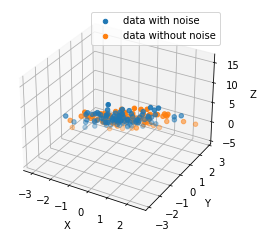

In [5]:
#ploting some points out

a = Graphic3D(clean, noise)
a.graph()